In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add wine type column
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

In [3]:
# Data preparation
X = wine_data.drop(['quality', 'wine_type'], axis=1)
y = wine_data['quality']

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [6]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

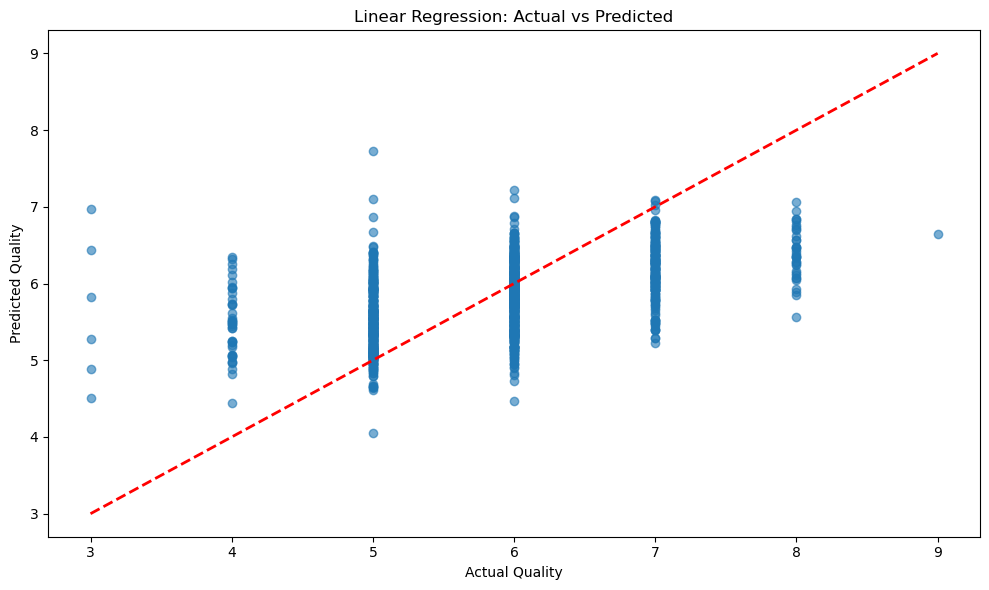

In [7]:
# Create visualizations separately
# 1. Actual vs Predicted Quality (Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()

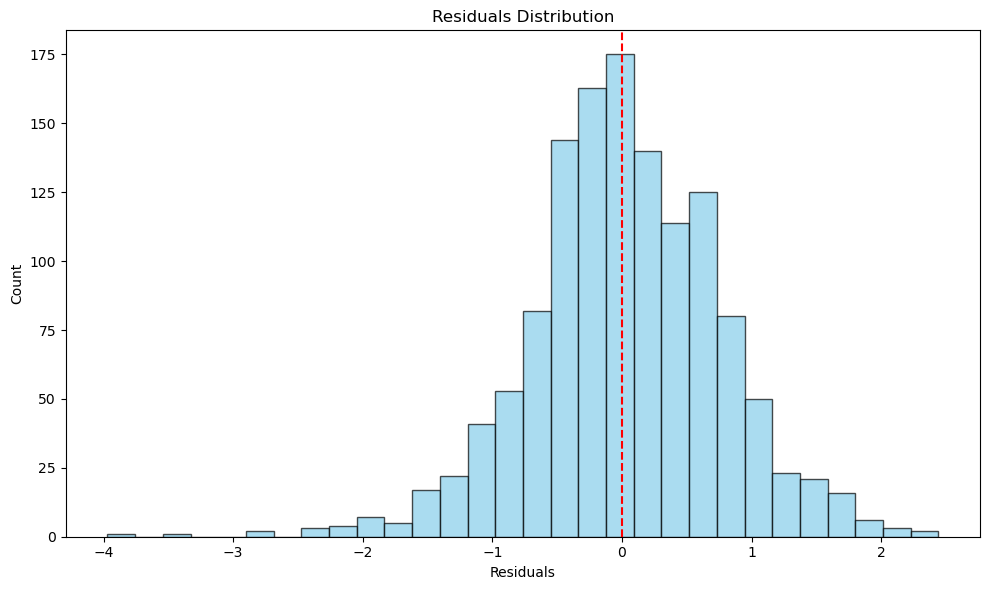

In [8]:
# 2. Residuals Distribution
plt.figure(figsize=(10, 6))
residuals = y_test - lr_pred
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

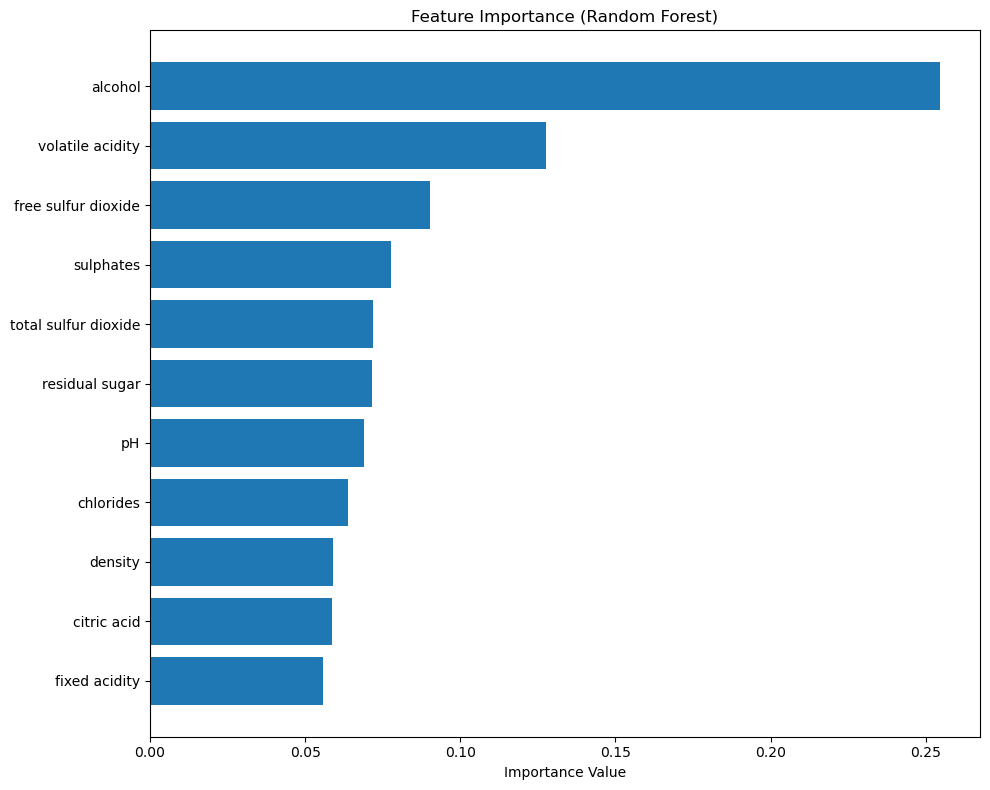

In [9]:
# 3. Feature Importance (Random Forest)
plt.figure(figsize=(10, 8))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance Value')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

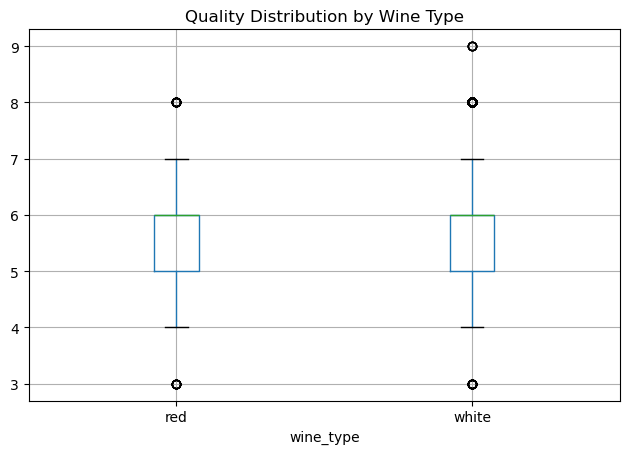

In [10]:
# 4. Quality Distribution by Wine Type
plt.figure(figsize=(10, 6))
wine_data.boxplot(column='quality', by='wine_type')
plt.title('Quality Distribution by Wine Type')
plt.suptitle('')
plt.tight_layout()
plt.show()

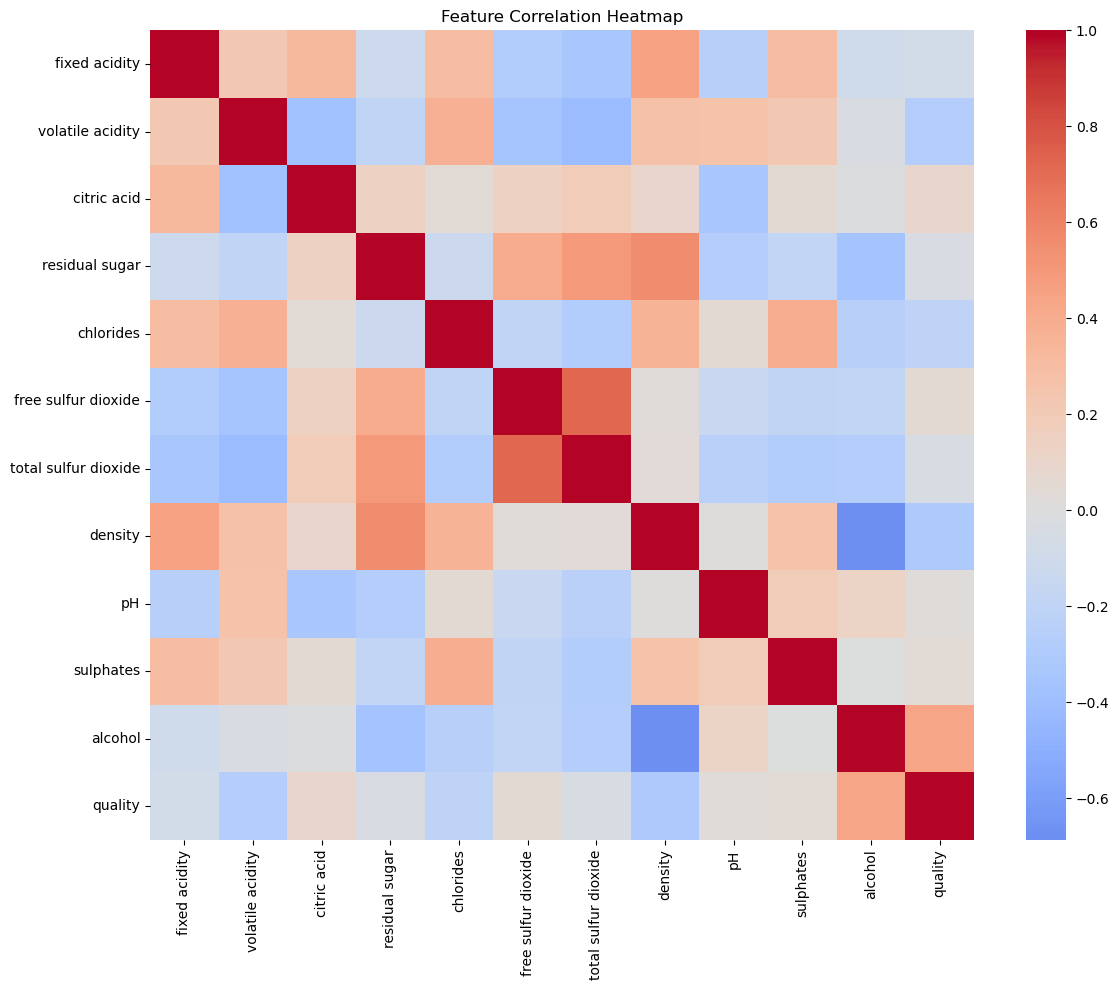

In [11]:
# 5. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = wine_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

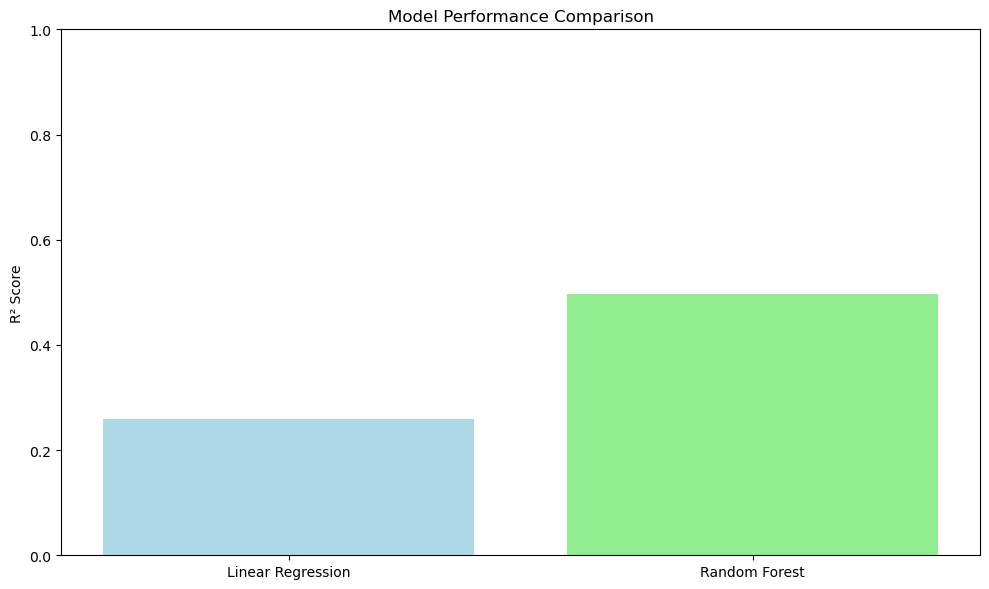

In [12]:
# 6. Model Performance Comparison
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)]
plt.bar(models, r2_scores, color=['lightblue', 'lightgreen'])
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [13]:
# Print model performance metrics
print(f"Linear Regression R²: {r2_score(y_test, lr_pred):.3f}")
print(f"Random Forest R²: {r2_score(y_test, rf_pred):.3f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.3f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.3f}")


Linear Regression R²: 0.260
Random Forest R²: 0.497
Linear Regression RMSE: 0.739
Random Forest RMSE: 0.609


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load datasets
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

# Combine datasets and add 'type' column
red['type'] = 'red'
white['type'] = 'white'
wine = pd.concat([red, white], ignore_index=True)

# Binarize quality: 1 = good (>=7), 0 = not good (<7)
wine['good'] = (wine['quality'] >= 7).astype(int)

# Prepare features and target
X = wine.drop(['quality', 'good', 'type'], axis=1)
y = wine['good']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

# Display results
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1
Logistic Regression,0.821538,0.609091,0.261719,0.366120
Naive Bayes,0.750769,0.411917,0.621094,0.495327
SVM,0.831538,0.672897,0.281250,0.396694
Random Forest,0.881538,0.783333,0.550781,0.646789
